# 第5讲 FLAG如何用无监督方法解决维度灾难问题？

## 1.有哪些常见度量方法

## Common Measurement Methods in Unsupervised Learning

In the context of your course (Unsupervised Learning, Clustering, and Dimensionality Reduction), "measurement methods" refer to **Distance Metrics** or **Similarity Measures**. These are mathematical formulas used to quantify the "closeness" or "similarity" between two data points. The choice of metric is fundamental as it directly defines what a "cluster" is.

Here are the most common ones, grouped by data type:

---

### 1. For Continuous / Numerical Data

These are the most common metrics used in algorithms like K-Means, Hierarchical Clustering, and DBSCAN.

* **Euclidean Distance (L2 Norm)**
    * **Concept:** The most intuitive metric. It's the "straight-line" distance between two points in $n$-dimensional space.
    * **Formula:** For two vectors $\mathbf{x}$ and $\mathbf{y}$:
        $$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$
    * **Use Case:** Excellent for low-dimensional, dense data where the actual magnitude of difference matters.
    * **Note:** It is highly sensitive to the scale of the features. You **must** normalize or standardize your data (e.g., Z-score scaling) before using it.

* **Manhattan Distance (L1 Norm)**
    * **Concept:** Also known as "city block" distance. It's the sum of the absolute differences of the coordinates. Imagine navigating a grid of streets.
    * **Formula:**
        $$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|$$
    * **Use Case:** Often more robust to outliers than Euclidean distance. It's also preferred in some high-dimensional data scenarios.

* **Minkowski Distance**
    * **Concept:** A generalization of both Euclidean and Manhattan distance, controlled by a parameter $p$.
    * **Formula:**
        $$d(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}$$
    * **Note:**
        * If $p=1$, it is **Manhattan Distance**.
        * If $p=2$, it is **Euclidean Distance**.

---

### 2. For High-Dimensional Data (e.g., Text)

When dealing with very high-dimensional data, like text document vectors (e.g., TF-IDF), the *direction* of the vectors often matters more than their *magnitude*.

* **Cosine Similarity**
    * **Concept:** Measures the cosine of the angle between two non-zero vectors. It focuses on *orientation*, not *magnitude*.
    * **Formula:**
        $$\text{similarity}(\mathbf{x}, \mathbf{y}) = \cos(\theta) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|} = \frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2} \sqrt{\sum_{i=1}^{n} y_i^2}}$$
    * **Range:** $[-1, 1]$.
        * $1$ means the vectors point in the exact same direction.
        * $0$ means they are orthogonal (unrelated).
        * $-1$ means they point in opposite directions.

* **Cosine Distance**
    * **Concept:** Since clustering algorithms (like K-Means) need a *distance* (where 0 is "identical"), we convert similarity to distance.
    * **Formula:**
        $$d(\mathbf{x}, \mathbf{y}) = 1 - \text{Cosine Similarity}(\mathbf{x}, \mathbf{y})$$

---

### 3. For Categorical / Binary Data

When data isn't numerical, we use set-based or string-based metrics.

* **Hamming Distance**
    * **Concept:** For two vectors (or strings) of equal length, it's the number of positions at which the corresponding symbols are different.
    * **Use Case:** Ideal for binary data or categorical data with the same number of categories.
    * **Example:**
        * $\mathbf{x} = (1, 0, 0, 1, 1)$
        * $\mathbf{y} = (1, 1, 0, 0, 1)$
        * The distance is **2** (they differ at the 2nd and 4th positions).

* **Jaccard Similarity / Jaccard Index**
    * **Concept:** Measures similarity between two *sets*. It's the size of the intersection divided by the size of the union.
    * **Formula:** For two sets $A$ and $B$:
        $$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$
    * **Use Case:** Market basket analysis (e.g., similarity between two shopping carts), document similarity (comparing sets of words).
    * **Jaccard Distance:** $d(A, B) = 1 - J(A, B)$

---

### 4. For Probability Distributions (Common in Dimension Reduction)

* **Kullback-Leibler (KL) Divergence**
    * **Concept:** Measures how one probability distribution $P$ diverges from a second, expected probability distribution $Q$.
    * **Formula:**
        $$D_{KL}(P\|Q) = \sum_{i} P(i) \log\left(\frac{P(i)}{Q(i)}\right)$$
    * **Use Case:** This is **not** a true "distance" metric because it's *not symmetric* (i.e., $D_{KL}(P\|Q) \neq D_{KL}(Q\|P)$). However, it's a critical measurement method in dimension reduction algorithms like **t-SNE**, which tries to minimize the KL divergence between the data's distribution in high-dimensional space and its distribution in low-dimensional space.

### 2.什么是curse-of-dimension，请举一个例子?
## What is the Curse of Dimensionality?

The **Curse of Dimensionality** is a term that describes the various problems that arise when analyzing and organizing data in high-dimensional spaces (i.e., data with many features or dimensions) that do not occur in low-dimensional spaces.

As the number of dimensions increases, the volume of the space grows exponentially. This exponential growth causes several issues that can break down many machine learning algorithms, especially those that rely on distance or density.

---

### Key Problems Caused by the Curse

1.  **Data Sparsity**
    * **Problem:** As you add more dimensions, your data points become farther and farther apart. To maintain the same density of data points you had in a lower dimension, you would need an *exponentially* larger amount of data.
    * **Consequence:** In a high-dimensional space, almost all data points are "lonely" and far away from each other. This makes it extremely difficult to find local patterns or "neighbors," which is the basis for algorithms like K-Means, DBSCAN, and K-Nearest Neighbors (K-NN).

2.  **Distance Metrics Lose Meaning**
    * **Problem:** A bizarre effect of high dimensions is that the distances between most pairs of points tend to converge. The difference between the maximum and minimum distance to a query point becomes vanishingly small.
    * **Consequence:** If every point is "equally distant" from every other point, then distance-based algorithms can no longer distinguish between close neighbors and distant points. The concept of "nearest neighbor" becomes meaningless.

3.  **Computational Complexity**
    * **Problem:** More dimensions = more calculations. The computational cost of most algorithms increases significantly with the number of dimensions ($D$).
    * **Consequence:** Algorithms become much slower and require vastly more memory, often becoming computationally infeasible.

4.  **Overfitting**
    * **Problem:** When the number of features ($D$) is large, especially when it's close to or larger than the number of samples ($N$), it's very easy for a model to find a complex "pattern" in the training data's noise rather than the true, underlying relationship.
    * **Consequence:** The model performs perfectly on the training data but fails miserably on new, unseen test data.

---

### An Intuitive Example: "Beans in a Box"

This example helps visualize the **data sparsity** problem. Imagine your task is to cluster, and you need data points to be "close" to each other to form a cluster.

* **1D Space (a line):**
    Imagine you have a 10-meter-long line segment. If you randomly drop **10 beans** on it, the average gap between beans is 1 meter. They look quite dense and are easy to cluster.

* **2D Space (a square):**
    Now you have a $10 \times 10$ meter square (Area: $100 m^2$). You drop the same **10 beans**. Now, each bean "owns" an average of $10 m^2$ of space. They are already looking very sparse and far apart.

* **3D Space (a cube):**
    Now, take a $10 \times 10 \times 10$ meter cube (Volume: $1000 m^3$). You drop the same **10 beans**. Each bean now "owns" an average of $100 m^3$ of space. The beans are virtually "lost" in the vast emptiness of the cube.

* **10D Space (a hypercube):**
    If we extend this to 10 dimensions, the volume is $10^{10}$ (10 billion) cubic meters. Your 10 beans are now so astronomically far apart that the chance of any two being "close" is almost zero.

**Conclusion:**
In 1D, 10 samples might be enough. In 10D, 10 samples are effectively an empty dataset. To get the same data density in 10D as you had in 1D, you would theoretically need $10^{10}$ (ten billion) beans.

This is why **Dimension Reduction** (as mentioned in your course content) is so critical. It's a primary strategy to combat the curse of dimensionality by projecting data into a lower-dimensional space while trying to preserve the most important information.

### 3.层次聚类和密度聚类分别是什么，有什么区别?

Here is a breakdown of Hierarchical Clustering and Density-Based Clustering.

---

## 1. Hierarchical Clustering

### Core Idea

Hierarchical Clustering builds a hierarchy of clusters, represented by a tree-like structure called a **dendrogram**. It doesn't produce a single, flat set of clusters. Instead, it creates a full hierarchy that you can "cut" at different levels to get different numbers of clusters.

There are two main types:

1.  **Agglomerative (Bottom-Up):** This is the most common approach.
    * **Start:** Every single data point is its own cluster.
    * **Process:** In each step, the two "closest" clusters are merged into one. This continues until...
    * **End:** All data points are in one single, giant cluster.

2.  **Divisive (Top-Down):**
    * **Start:** All data points are in one single cluster.
    * **Process:** In each step, a cluster is split into two. This continues until...
    * **End:** Every single data point is its own cluster.

The "closeness" of two clusters is determined by a **linkage method** (e.g., *single-link*, *complete-link*, *average-link*), which defines the distance between clusters.

### Key Characteristics

* **Output:** The main output is the **dendrogram**, which is a powerful visualization of the data's structure.
* **Number of Clusters (k):** You **do not** need to specify $k$ beforehand. You can choose $k$ *after* running the algorithm by looking at the dendrogram and deciding where to "cut" the tree.
* **Cluster Shape:** Tends to find globular (sphere-like) clusters. It struggles with complex, non-globular shapes.
* **Noise:** It is not robust to noise. Every point will be assigned to a cluster, even outliers.
* **Scalability:** Computationally expensive. The time complexity is typically $O(n^2 \log n)$ or $O(n^3)$, making it unsuitable for very large datasets.

---

## 2. Density-Based Clustering

### Core Idea

Density-Based Clustering defines clusters as **continuous regions of high density**, separated by regions of low density. The most famous algorithm is **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise).

### How DBSCAN Works

DBSCAN operates using two key parameters:

1.  **`eps` (epsilon):** A radius. This defines the "neighborhood" around a point.
2.  **`MinPts`:** The minimum number of points required to be inside a point's `eps`-neighborhood for that point to be considered a "dense" region.

Based on these parameters, it classifies every point as one of three types:

* **Core Point:** A point that has at least `MinPts` (including itself) within its `eps`-radius. These are the "hearts" of a cluster.
* **Border Point:** A point that is *not* a core point, but *is* in the `eps`-neighborhood of a core point. These are the "edges" of a cluster.
* **Noise Point (Outlier):** A point that is neither a core point nor a border point.

The algorithm works by picking a point, checking if it's a core point, and if so, "expanding" from it to find all connected core points (and their border points) to form a single cluster.

### Key Characteristics

* **Output:** A single set of clusters, plus a set of points identified as noise.
* **Number of Clusters (k):** You **do not** need to specify $k$. The algorithm finds the number of clusters automatically.
* **Cluster Shape:** This is its greatest strength. It can find **arbitrarily shaped clusters** (e.g., spirals, moons, blobs) and is not limited to globular shapes.
* **Noise:** It is **highly robust to noise** and has a built-in mechanism for identifying and labeling outliers.
* **Scalability:** More efficient than hierarchical clustering, often $O(n \log n)$ if using spatial indexes (though worst-case is $O(n^2)$).

---

## 3. Key Differences: Hierarchical vs. Density-Based

| Feature | Hierarchical Clustering | Density-Based Clustering (e.g., DBSCAN) |
| :--- | :--- | :--- |
| **Core Principle** | Based on **distance** and merging/splitting. | Based on **local density** and connectivity. |
| **Cluster Shape** | Tends to find **globular / convex** shapes. | Can find **arbitrary, non-globular** shapes. |
| **Noise Handling** | Poor. Forces all points into clusters. | Excellent. Has a built-in concept for **noise/outliers**. |
| **Output** | A **dendrogram** (tree hierarchy). | A single partition of clusters (and noise points). |
| **Parameters** | Needs a **linkage method** (e.g., complete, average) and a **cut-off** (or $k$). | Needs **`eps`** (radius) and **`MinPts`** (min density). |
| **Specify $k$?** | No. You choose $k$ *after* by cutting the dendrogram. | No. The number of clusters is an *output* of the algorithm. |
| **Scalability** | Poor. $O(n^2 \log n)$ or $O(n^3)$. Bad for large data. | Better. $O(n \log n)$. Can handle larger datasets. |
| **Main Weakness** | Greedy (merges can't be undone), sensitive to linkage. | Sensitive to `eps`/`MinPts`, struggles with varying densities. |

### 4.K-means和K-means ++ 的区别
The key difference between K-means and K-means++ is their **initialization method**—that is, how they choose the very first set of $k$ centroids.

After this initial step, both algorithms use the *exact same* iterative process to cluster the data (the "assignment" and "update" steps).

K-means++ is not a new clustering algorithm; it is an **improvement on the initialization step** of the standard K-means algorithm.

---

### 1. Standard K-means: The Problem

The standard K-means algorithm (also called "Forgy" initialization) starts in a very simple way:

* **Initialization:** It randomly picks $k$ data points from the dataset and sets them as the initial cluster centroids.

**The problem with this is "bad luck."** If you are unlucky, the random initialization might place all the initial centroids very close to each other, or place them all in one large cluster while ignoring another obvious cluster.

A bad initialization can lead to two major issues:
1.  **Poor Clustering (Local Optima):** The algorithm can get "stuck" in a suboptimal solution, resulting in incorrect cluster assignments.
2.  **Slow Convergence:** It may take many more iterations (assignment/update steps) for the centroids to move to their proper positions.

---

### 2. K-means++: The Solution

K-means++ (or "K-means plus plus") was designed to fix this "bad luck" problem by using a smarter, probabilistic initialization that spreads the initial centroids far apart.

* **Initialization (Step-by-Step):**
    1.  **Choose First Centroid:** Pick the first centroid ($c_1$) randomly from the data points, just like standard K-means.
    2.  **Choose Second Centroid:** For every other data point $x$, calculate its squared distance $D(x)^2$ to the *nearest* centroid that has already been chosen (at this point, just $c_1$).
    3.  Choose the next centroid ($c_2$) from the remaining data points with a probability proportional to $D(x)^2$. This means points *farther away* from the first centroid have a much *higher chance* of being chosen as the second centroid.
    4.  **Choose Remaining Centroids:** Repeat step 2 and 3. For each new centroid, calculate the distance from every point $x$ to its *closest existing centroid*. Then, select the next centroid from the data points, again using a probability proportional to that squared distance.
    5.  **Finish:** Repeat until all $k$ centroids have been chosen.

**The core idea is simple:** By making points that are far from existing centroids more likely to be chosen next, K-means++ ensures the initial $k$ centroids are well-spaced across the entire dataset.

---

### Summary: K-means vs. K-means++

| Feature | Standard K-means | K-means++ |
| :--- | :--- | :--- |
| **Centroid Initialization** | **Purely random.** Picks $k$ points at random. | **Probabilistic & "smart."** Picks the first point randomly, then picks subsequent points based on their distance from existing centroids. |
| **Goal of Initialization** | Just to get started. | To spread initial centroids far apart. |
| **Result Quality** | Can be unstable. Highly dependent on the initial random seed. May get stuck in a bad local optimum. | Much more stable and consistent. Tends to find a better (or the optimal) clustering solution. |
| **Speed** | Initialization is very fast, but the clustering process (convergence) can be slow if initialization is poor. | Initialization is slower (it requires calculating distances), but the clustering process (convergence) is often **much faster** because it starts from a better place. |

**Conclusion:** K-means++ is almost always preferred over standard K-means. Its smarter initialization step takes a little more time upfront but reliably leads to better cluster quality and often results in a faster overall clustering time due to quicker convergence. Most modern ML libraries (like scikit-learn) use K-means++ as the default initialization method for their K-means algorithm.

### 5.K-means的收敛性存在吗？
Yes, the K-means algorithm is **guaranteed to converge**.

"Convergence" in this context means that the algorithm will **always stop** and will not run in an infinite loop.

Here is a more detailed explanation of *why* it converges and the important *caveat* to this convergence.

---

### 1. What Convergence Means for K-means

The K-means algorithm stops when the cluster assignments no longer change between iterations.

This happens when:
1.  No data point changes its cluster assignment in the "Assignment Step."
2.  Because no points changed clusters, the "Update Step" (calculating the mean) results in the *exact same* centroid positions as the previous iteration.
3.  Since the centroids haven't moved, the assignments in the *next* iteration will also be identical, and the algorithm terminates.

---

### 2. Why It Is Guaranteed to Converge

The guarantee of convergence comes from the fact that K-means is an optimization algorithm that tries to minimize a specific cost function.

* **The Objective Function:** K-means aims to minimize the **Within-Cluster Sum of Squares (WCSS)**, also known as **Inertia**. This is the sum of the squared Euclidean distances between each data point and its assigned cluster centroid.
    $$J = \sum_{j=1}^{k} \sum_{i \in C_j} ||x_i - \mu_j||^2$$
    (where $C_j$ is the set of points in cluster $j$, and $\mu_j$ is the centroid of cluster $j$)

The two steps of the K-means algorithm are designed to *never increase* this WCSS value:

1.  **Assignment Step:** Each point $x_i$ is assigned to its *closest* centroid $\mu_j$. By definition, this step will either *decrease* the WCSS (if a point finds a closer centroid) or keep it the same (if all points are already assigned to their closest centroid).
2.  **Update Step:** Each centroid $\mu_j$ is recalculated as the *mean* of all points assigned to it. In mathematics, the mean is the unique point that *minimizes* the sum of squared distances for that set of points. Therefore, this step will also *decrease* the WCSS or keep it the same.

**The Proof:**
* Since both steps of the algorithm can only *decrease* or *maintain* the WCSS, the total WCSS value is **monotonically decreasing** (or non-increasing) with every single iteration.
* The WCSS is a sum of squares, so it is a positive value that is **bounded below by 0**.
* A mathematical sequence that is monotonically decreasing and is bounded below *must* converge to a fixed value.

Because the WCSS must eventually stop decreasing, the cluster assignments must also stop changing, and the algorithm **must stop**.

---

### 3. The Important Caveat: Local vs. Global Optimum

This is the most critical part to understand:

**K-means is guaranteed to converge, but it is NOT guaranteed to converge to the *best possible* solution (the global optimum).**

* **Global Optimum:** The single best clustering assignment that results in the *absolute lowest* WCSS possible for the given data.
* **Local Optimum:** A "valley" in the cost landscape. The algorithm stops here because any small change in assignments would *increase* the WCSS, so it gets "stuck" in a solution that is "good, but not the best."

The final solution (the local optimum it finds) is highly dependent on the **initial random placement** of the centroids.

* This is precisely the problem that **K-means++** initialization was created to solve. By starting the centroids far apart, K-means++ significantly increases the chance of finding the *global optimum*.
* This is also why it is standard practice to run the K-means algorithm multiple times (e.g., 10 times, `n_init=10` in scikit-learn) with different random initializations, and then choose the final clustering that produced the lowest WCSS.

### 6.如何用PCA对数据降维
## How to Reduce Dimensionality Using PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is the most popular technique for dimensionality reduction.

Its core idea is not to *drop* features, but to *transform* the original features into a new, smaller set of features called **Principal Components (PCs)**. These new features are specially crafted to capture the maximum amount of information (variance) from the original data.

Here is the step-by-step process of how it works.

---

### The Intuitive Goal

Imagine you have data points in 3D (e.g., a 3D scatter plot of a chair). Your goal is to reduce it to 2D (a flat image).

How would you "photograph" the chair to get the most informative 2D image? You wouldn't photograph it from the top (you'd just see the seat) or straight from the side (you might miss the depth). You'd find an angle that shows its shape, legs, and back all at once.

PCA mathematically finds the "best angles" (the principal components) to "view" the data, such that the 2D projection (the "shadow" it casts) retains the *maximum possible spread* (variance) of the original data.

---

### Step-by-Step: How PCA Works

Let's assume you start with a dataset $X$ that has $n$ samples and $d$ dimensions (features). You want to reduce it to $k$ dimensions (where $k < d$).

#### Step 1: Standardize the Data

This is a **critical** first step.

* **Why:** PCA finds new axes based on *variance*. If your original features are on different scales (e.g., 'Age' from 20-80 and 'Salary' from 50,000-500,000), the 'Salary' feature will completely dominate the variance, and PCA will mistakenly think it's the only important feature.
* **How:** For each feature (column), you subtract its mean and divide by its standard deviation (this is called Z-score normalization). After this, every feature will have a mean of 0 and a standard deviation of 1.

#### Step 2: Compute the Covariance Matrix

* **Why:** Now that the data is standardized, we need to understand how the features vary *with each other*. The covariance matrix stores this information.
* **How:** You compute a $d \times d$ matrix (where $d$ is the number of original dimensions).
    * The diagonal elements ($C_{ii}$) are the *variance* of that feature with itself.
    * The off-diagonal elements ($C_{ij}$) are the *covariance* between feature $i$ and feature $j$. A positive value means they tend to increase together; a negative value means one increases as the other decreases.

#### Step 3: Calculate Eigenvectors and Eigenvalues

This is the core mathematical step of PCA. You "decompose" the covariance matrix.

* **What:** You find the **eigenvectors** and their corresponding **eigenvalues** from the $d \times d$ covariance matrix.
* **Eigenvectors:** These are the new "axes" for your data. They represent the *directions* of maximum variance. These are the **Principal Components (PCs)**.
    * The first eigenvector (PC1) is the single direction that captures the *most* variance in the data.
    * The second eigenvector (PC2) is the direction that captures the *second-most* variance, with the constraint that it must be **orthogonal** (at a 90-degree angle) to PC1.
    * This continues for all $d$ dimensions.
* **Eigenvalues:** This is a single number for each eigenvector. It tells you the *amount* or *magnitude* of variance that its corresponding eigenvector (PC) captures.

#### Step 4: Choose the Number of Components (k)

* **Why:** You now have $d$ principal components, but the goal is to *reduce* the dimensions. You must decide how many components $k$ to keep.
* **How:**
    1.  **Sort:** You sort the eigenvalues from largest to smallest. The eigenvector with the largest eigenvalue is PC1, the next is PC2, and so on.
    2.  **Analyze "Explained Variance":** You calculate the percentage of total variance each PC accounts for:
        $$\text{Explained Variance} = \frac{\text{Eigenvalue of PC1}}{\text{Sum of all Eigenvalues}}$$
    3.  **Decide $k$:** You can choose $k$ in two common ways:
        * **Percentage Rule:** Keep adding components until you have captured a sufficient amount of the total variance (e.g., **95%** or **99%**).
        * **Scree Plot:** Plot the eigenvalues in order (from high to low). This graph will usually show a sharp "elbow" and then flatten out. You choose $k$ to be the number of components at the "elbow," as this is the point of diminishing returns.

#### Step 5: Transform (Project) the Data

* **Why:** You have your original data (standardized, $n \times d$) and you have chosen your top $k$ components. Now you need to create the new, low-dimensional dataset.
* **How:**
    1.  Create a **projection matrix** $W$ by taking the $k$ eigenvectors you decided to keep and stacking them as columns. This matrix will have dimensions $d \times k$.
    2.  Multiply your original standardized data $X$ (an $n \times d$ matrix) by this projection matrix $W$.

        $$X_{\text{new}} = X_{\text{standardized}} \times W$$
        $$[n \times k] = [n \times d] \times [d \times k]$$

* **Result:** The output, $X_{\text{new}}$, is your new dataset. It has $n$ samples just like the original, but now it only has $k$ dimensions (features). This new data can now be fed into a clustering algorithm or machine learning model, which will perform much better due."

--- Original 3D Data ---
Original shape: (100, 3)
   feature1  feature2  feature3
0 -1.091311 -0.874904 -0.214690
1 -3.363939 -2.368498 -1.184468
2 -2.643629 -2.893405 -2.337104
3 -1.553866 -0.594054 -0.073069
4 -2.273375  0.820088  1.563426

--- Standardized Data (first 5 rows) ---
[[-0.38918978 -0.57007661 -0.26063004]
 [-1.56631647 -1.63952828 -1.01194246]
 [-1.19322593 -2.01537515 -1.90492013]
 [-0.62877397 -0.36898067 -0.15091235]
 [-1.0014496   0.64358164  1.11692381]]

--- Reduced 2D Data (after PCA) ---
New shape: (100, 2)
[[-0.72246694 -0.10141601]
 [-2.44346114 -0.44110704]
 [-2.98606442  0.44400953]
 [-0.64851838 -0.35409008]
 [ 0.52627515 -1.50132863]]

--- Explained Variance ---
Explained variance by component: [0.70971453 0.27857316]
Total variance explained by 2 components: 98.83%

Visualization saved to 'pca_3d_to_2d_reduction.png'


/var/folders/56/_q1k7zs52t9997xq9ncxwdx00000gn/T/ipykernel_88794/138612795.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], cmap='viridis')


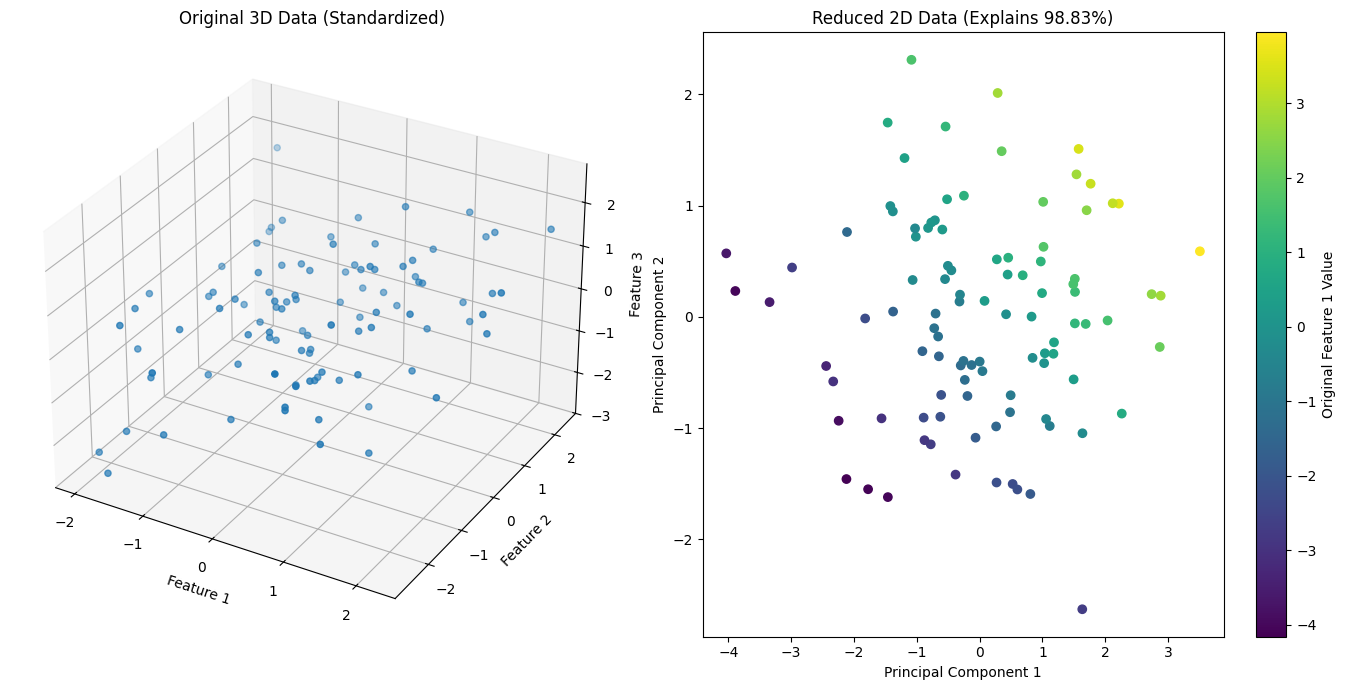

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Step 0: Create Sample 3D Data ---
# We'll create data that is correlated, making it a good candidate for PCA.
np.random.seed(42)
mean = [0, 0, 0]
# Define a covariance matrix to make features correlated
cov = [[5, 3, 1],
       [3, 3, 2],
       [1, 2, 2]]
data_3d = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data_3d, columns=['feature1', 'feature2', 'feature3'])

print("--- Original 3D Data ---")
print(f"Original shape: {df.shape}")
print(df.head())

# --- Step 1: Standardize the Data ---
# This is crucial for PCA to work correctly.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

print("\n--- Standardized Data (first 5 rows) ---")
print(data_scaled[:5])

# --- Step 2, 3, 4: Apply PCA (Reduce from 3D to 2D) ---
# We ask PCA to find the best 2 components (k=2)
# scikit-learn handles covariance, eigenvectors, and sorting internally.
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

print("\n--- Reduced 2D Data (after PCA) ---")
print(f"New shape: {data_2d.shape}")
print(data_2d[:5])

# --- Step 5: Analyze the Results ---
# Let's see how much information (variance) we kept.
print("\n--- Explained Variance ---")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")
total_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total variance explained by 2 components: {total_variance:.2%}")

# --- Step 6: Visualize the Reduction ---
fig = plt.figure(figsize=(14, 7))

# Plot 1: Original 3D Data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], cmap='viridis')
ax1.set_title('Original 3D Data (Standardized)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

# Plot 2: Reduced 2D Data
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=data_3d[:, 0]) # Color by one of the original features
ax2.set_title(f'Reduced 2D Data (Explains {total_variance:.2%})')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
plt.colorbar(scatter, ax=ax2, label='Original Feature 1 Value')

plt.tight_layout()
plt.savefig('pca_3d_to_2d_reduction.png')

print("\nVisualization saved to 'pca_3d_to_2d_reduction.png'")